# Los Angeles Police Killings (2000 - Present)

This notebook will explore the Los Angeles Times' database of people killed by local police in Los Angeles County since 2000.

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Import data

Pull the data from the LA Times Data and Graphics Department's [github repository](https://github.com/datadesk/los-angeles-police-killings-data) containing the [database](https://github.com/datadesk/los-angeles-police-killings-data/blob/master/los-angeles-police-killings.csv).

The data was pulled on June 11, 2020 at 8:30PM.

In [291]:
killings_data = pd.read_csv('https://raw.githubusercontent.com/datadesk/los-angeles-police-killings-data/master/los-angeles-police-killings.csv')

## Explore the database

Looking at the head of the dataset:

In [292]:
killings_data.head()

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
0,robert-melton-colvin,2020-05-29,Robert,Melton,Colvin,39,white,male,gunshot,1700 block W. Avenue K,Lancaster,-118.161524,34.674637
1,rommel-firmalino-mendoza,2020-05-27,Rommel,Firmalino,Mendoza,50,latino,male,gunshot,6400 block of Elmer Ave.,North Hollywood,-118.376882,34.186690
2,robert-avitia,2020-05-26,Robert,NaN,Avitia,18,latino,male,gunshot,1100 block of West 109th Place,Westmont,-118.294389,33.936126
3,anthony-ysaac,2020-05-14,Anthony,NaN,Ysaac,26,latino,male,gunshot,733 W. 123rd St.,Harbor Gateway,-118.288177,33.921445
4,lloyd-nelson-jr,2020-05-08,Lloyd,NaN,Nelson,47,other,NaN,NaN,Corson Street and Allen Avenue,Pasadena,-118.113302,34.151841


Info of the variables:

In [293]:
killings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   slug          885 non-null    object 
 1   death_date    885 non-null    object 
 2   first_name    885 non-null    object 
 3   middle_name   534 non-null    object 
 4   last_name     885 non-null    object 
 5   age           885 non-null    int64  
 6   race          882 non-null    object 
 7   gender        884 non-null    object 
 8   cause         884 non-null    object 
 9   address       879 non-null    object 
 10  neighborhood  879 non-null    object 
 11  x             879 non-null    float64
 12  y             879 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 90.0+ KB


There are 885 people in the database. The `date_death` will need to be converted to a datetime type instead of object.

Convert the `death_date` to datetime:

In [294]:
killings_data['death_date'] = pd.to_datetime(killings_data.death_date)

In [295]:
killings_data.death_date.head()

0   2020-05-29
1   2020-05-27
2   2020-05-26
3   2020-05-14
4   2020-05-08
Name: death_date, dtype: datetime64[ns]

Describe the numeric variables:

In [296]:
killings_data.describe()

,age,x,y
count,885.000000,879.000000,879.000000
mean,32.855367,-118.239551,34.032251
std,12.126944,0.156728,0.174744
min,1.000000,-118.704535,33.737677
25%,23.000000,-118.332933,33.923810
50%,30.000000,-118.249004,34.012065
75%,40.000000,-118.160446,34.095034
max,84.000000,-117.728001,34.717889


In [297]:
killings_data.describe(include='all')

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
count,885,885,885,534,885,885.000000,882,884,884,879,879,879.000000,879.000000
unique,885,822,440,327,625,NaN,5,2,4,865,189,NaN,NaN
top,andrew-macearchern,2001-02-18 00:00:00,Jose,Joseph,Garcia,NaN,latino,male,gunshot,1006 Alamitos Ave.,Long Beach,NaN,NaN
freq,1,3,26,12,20,NaN,465,851,870,2,60,NaN,NaN
first,NaN,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32.855367,NaN,NaN,NaN,NaN,NaN,-118.239551,34.032251
std,NaN,NaN,NaN,NaN,NaN,12.126944,NaN,NaN,NaN,NaN,NaN,0.156728,0.174744
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-118.704535,33.737677
25%,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,-118.332933,33.923810


### Missing data

To get an overview of the missing data, I'll use a heatmap to visualize it.

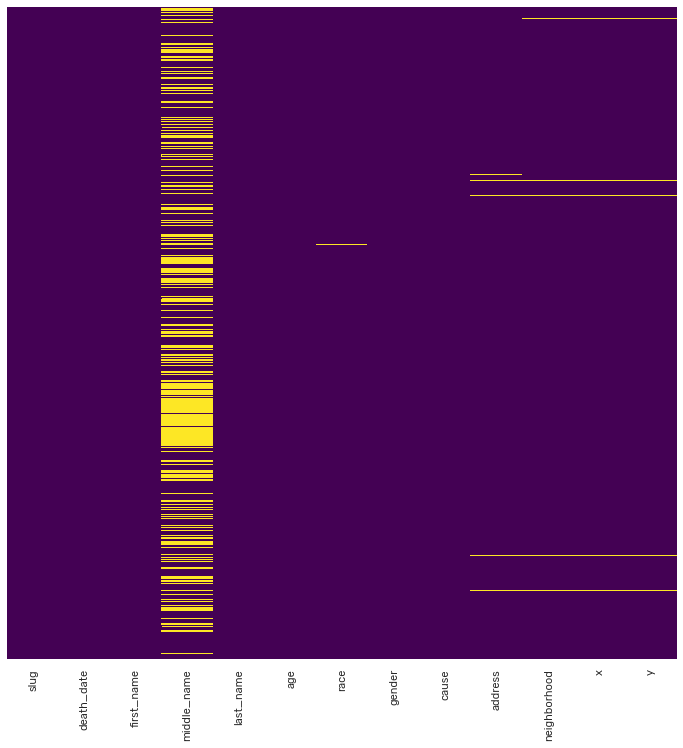

In [298]:
plt.figure(figsize=(12,12))
sns.heatmap(killings_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The only mostly variable with a substatial amount of missing values is the `middle_name` field, which is not a problem.

The number of missing values:

In [299]:
killings_data.isnull().sum()

slug              0
death_date        0
first_name        0
middle_name     351
last_name         0
age               0
race              3
gender            1
cause             1
address           6
neighborhood      6
x                 6
y                 6
dtype: int64

People with no race recorded:

In [300]:
killings_data[killings_data.race.isnull()]

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
57,robert-george-olivas,2018-10-20,Robert,George,Olivas,33,NaN,male,other,12051 Ventura Place,Studio City,-118.394289,34.144649
322,rigoberto-arceo,2013-05-11,Rigoberto,NaN,Arceo,34,NaN,male,gunshot,4105 Walnut St.,Cudahy,-118.195148,33.970239
749,yousuf-ali-mollah,2003-07-27,Yousuf,Ali,Mollah,32,NaN,male,gunshot,945 N. Serrano Ave.,East Hollywood,-118.306776,34.087587


Person with no gender or cause of death recorded:

In [301]:
killings_data[killings_data.gender.isnull() | killings_data.cause.isnull()]

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
4,lloyd-nelson-jr,2020-05-08,Lloyd,NaN,Nelson,47,other,NaN,NaN,Corson Street and Allen Avenue,Pasadena,-118.113302,34.151841


The records with missing addresses, neighborhoods, and coordinates seem to be the same people:

In [302]:
killings_data[killings_data.address.isnull() | killings_data.neighborhood.isnull()  | killings_data.x.isnull()  | killings_data.y.isnull()]

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y
16,kerry-michael-bounsom,2020-02-16,Kerry,Michael,Bounsom,33,black,male,gunshot,East Rhea Street & Martin Luther King Jr. Avenue,NaN,NaN,NaN
227,henry-ybarra-acuna,2015-03-18,Henry,Ybarra,Acuna,56,latino,male,gunshot,NaN,Pomona,-117.754929,34.039716
235,michael-frederick-mears,2014-12-26,Michael,Frederick,Mears,39,white,male,other,NaN,NaN,NaN,NaN
256,omar-figueroa-abrego,2014-08-03,Omar,Figueroa,Abrego,37,latino,male,other,NaN,NaN,NaN,NaN
357,vachel-howard-sr,2012-06-04,Vachel,NaN,Howard,56,black,male,other,NaN,NaN,NaN,NaN
744,ronald-eduardo-guzman,2003-08-22,Ronald,Eduardo,Guzman,19,latino,male,gunshot,NaN,NaN,NaN,NaN
792,david-miranda,2002-09-23,David,NaN,Miranda,28,latino,male,gunshot,NaN,NaN,NaN,NaN


In total they are just a group of 7 people.

Add variables for the month and year they were killed and their full name:

In [303]:
killings_data['month'] = killings_data['death_date'].apply(lambda x: x.month)
killings_data['year'] = killings_data['death_date'].apply(lambda x: x.year)
killings_data['full_name'] = killings_data.first_name + ' ' + killings_data.last_name

## Number of Police Killings
### Across all years
**Per race**

In [304]:
killings_data.race.value_counts()

latino    465
black     219
white     168
asian      28
other       2
Name: race, dtype: int64

**Per cause**

In [305]:
killings_data.cause.value_counts()

gunshot        870
other           12
pending          1
blunt-force      1
Name: cause, dtype: int64

**Per neighborhood**

In [306]:
killings_data.neighborhood.value_counts()

Long Beach                               60
Compton                                  28
Inglewood                                25
East Los Angeles                         23
Downtown                                 19
                                         ..
Lincoln Heights                           1
Echo Park                                 1
Hacienda Heights                          1
Adams-Normandie                           1
Unincorporated Santa Monica Mountains     1
Name: neighborhood, Length: 189, dtype: int64

In [311]:
mat_all = killings_data.groupby(by = [killings_data.death_date.dt.year,'month']).count()['slug'].unstack()
mat_all = mat_all.fillna(0)
mat_all.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
death_date,,,,,,,,,,,,
2000,1.0,6.0,1.0,4.0,2.0,2.0,4.0,5.0,7.0,2.0,2.0,1.0
2001,1.0,7.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,5.0,2.0
2002,5.0,3.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0
2003,9.0,4.0,4.0,7.0,2.0,2.0,5.0,4.0,6.0,4.0,5.0,1.0
2004,8.0,4.0,2.0,3.0,4.0,4.0,7.0,4.0,2.0,2.0,4.0,3.0


In [313]:
sns.set(font_scale=1,font='Rubik',style='whitegrid')

Text(156.5, 0.5, '')

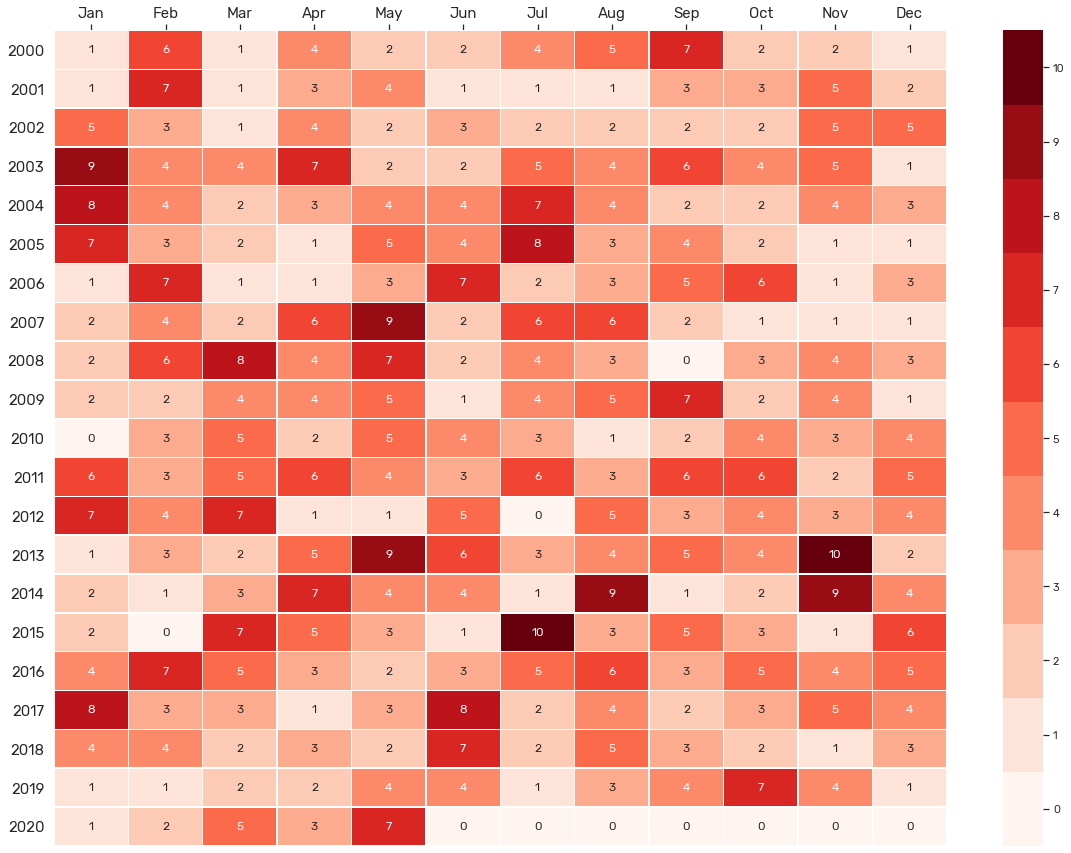

In [321]:
monthticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yrticks = np.arange(2000,2021,1)
ticks=np.arange(mat_all.values.min(),mat_all.values.max()+1 )
boundaries = np.arange(mat_all.values.min()-.5,mat_all.values.max()+1.5 )
plt.figure(figsize=(20,15))
cmap = plt.get_cmap("Reds", mat_all.values.max()-mat_all.values.min()+1)
heatmap = sns.heatmap(mat_all, annot=True, linewidths=0.4, cmap=cmap,
        cbar_kws={"ticks":ticks, "boundaries":boundaries} )
heatmap.xaxis.tick_top()
heatmap.set_xticklabels(monthticks,fontsize=15)
heatmap.set_yticklabels(yrticks,rotation=360, horizontalalignment='right',fontsize=15)
heatmap.set_xlabel('') 
heatmap.set_ylabel('') 

In [ ]:
There were only 3 months in the last 20 years where there were no one died at the hands of law enforcement.

### People killed by the police who were Black

In [318]:
black_killings = killings_data[killings_data.race == 'black']
black_killings

,slug,death_date,first_name,middle_name,last_name,age,race,gender,cause,address,neighborhood,x,y,month,year,full_name,week
16,kerry-michael-bounsom,2020-02-16,Kerry,Michael,Bounsom,33,black,male,gunshot,East Rhea Street & Martin Luther King Jr. Avenue,NaN,NaN,NaN,2,2020,Kerry Bounsom,7
19,nathaniel-robert-pinnock,2019-11-25,Nathaniel,Robert,Pinnock,22,black,male,gunshot,6700 block of Sunset Boulevard,Hollywood,-118.336858,34.097656,11,2019,Nathaniel Pinnock,48
24,delfon-garnell-kinney-sr,2019-10-23,Delfon,Garnell,Kinney,48,black,male,gunshot,1739 E. Artesia Blvd.,Long Beach,-118.171122,33.874918,10,2019,Delfon Kinney,43
26,lasseri-james-frazier-jr,2019-10-16,Lasseri,James,Frazier,21,black,male,gunshot,5400 block of Kester Avenue,Sherman Oaks,-118.457557,34.171962,10,2019,Lasseri Frazier,42
27,sawandi-toussaint,2019-10-12,Sawandi,Asad,Toussaint,21,black,male,gunshot,3500 block of Santa Anita Avenue,El Monte,-118.042137,34.072034,10,2019,Sawandi Toussaint,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,john-dennis-marshall,2000-07-20,John,Dennis,Marshall,54,black,male,gunshot,19326 Northwood Ave.,Carson,-118.241742,33.854858,7,2000,John Marshall,29
868,james-everitte-jenkins,2000-07-07,James,Everitte,Jenkins,35,black,male,gunshot,3825 Virginia St.,Lynwood,-118.202394,33.918588,7,2000,James Jenkins,27
869,everett-edward-evans,2000-06-14,Everett,Edward,Evans,47,black,male,gunshot,1452 W. 46th St.,Vermont Square,-118.302008,34.001644,6,2000,Everett Evans,24
873,billy-james-johnson-jr,2000-04-28,Billy,James,Johnson,30,black,male,gunshot,446 West Pacific Coast Highway (in rear),Long Beach,-118.197277,33.789539,4,2000,Billy Johnson,17


**Where were they killed?**

Using `bokeh` to make a barplot of the top 8 neighborhoods where the most black people were killed.

In [33]:
black_killings.neighborhood.value_counts().head(30)

Inglewood                 18
Long Beach                15
Compton                   15
Downtown                   7
Green Meadows              7
Gardena                    6
Vermont Square             6
Palmdale                   5
Bellflower                 5
Broadway-Manchester        5
Hollywood                  5
Florence                   5
Watts                      5
Lynwood                    4
Historic South-Central     4
Pasadena                   4
Hyde Park                  4
Athens                     4
Torrance                   4
Westmont                   4
Hawthorne                  4
Culver City                3
Westlake                   3
Exposition Park            3
Vermont-Slauson            3
Florence-Firestone         3
Carson                     3
Vermont Vista              3
Willowbrook                3
Baldwin Hills/Crenshaw     3
Name: neighborhood, dtype: int64

Get the top 8 neighborhoods:

In [140]:
top_neighborhoods = black_killings.neighborhood.value_counts().head(8).to_frame().sort_values(by='neighborhood', ascending=True)
top_neighborhoods

,neighborhood
Palmdale,5
Gardena,6
Vermont Square,6
Downtown,7
Green Meadows,7
Long Beach,15
Compton,15
Inglewood,18


Create a list of the neighborhoods to be read as the `y_range` in the figure:

In [142]:
neighborhoods = source.data['index'].tolist()

Create the source that `bokeh` will use:

In [141]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(data=top_neighborhoods)

In [108]:
from bokeh.models.tools import HoverTool
from bokeh.transform import factor_cmap

In [322]:
output_notebook()
p = figure(plot_width=750, plot_height=400, y_range = neighborhoods, toolbar_location=None)
p.hbar(y='index', right='neighborhood', source=source, height=0.95, line_color='white', color ="#EEDA9D")
p.x_range.start = 0
hover = HoverTool()
hover.tooltips = [("Neighborhood","@index"),
                   ("Number of killnings","@neighborhood")]
hover.mode = 'hline'
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [34]:
48/219

0.2191780821917808

Inglewood, Long Beach, and Compton had the highest concentrations of black killings in the last 20 years, accounting for 22% of the 219 killings. The remaining 71 neighborhoods each had less than half of the number of killings in either of the three.

### Map of killings since 2000

In [289]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(black_killings, lat='y', lon='x', size_max=15, hover_name="full_name", hover_data=["year","neighborhood","cause"])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**How old were they?**   
Distribution of ages of people who were killed that were black:

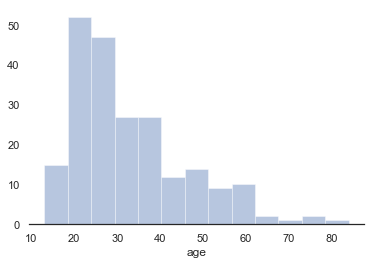

In [169]:
sns.distplot(black_killings.age, kde=False)
sns.despine(left=True)